In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
X = np.load("data_np/x.npy",allow_pickle=True)

In [3]:
y = np.load("data_np/y.npy")

In [4]:
X = pd.DataFrame(X)

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.403711,0.794279,-8.020860e-07,0.442649,0.714280,-0.051895,0.412139,0.616973,-0.069135,0.311323,...,-0.021733,0.096725,0.596994,-0.042761,0.048448,0.569356,-0.044506,0.013682,0.539196,-0.040053
1,0.721911,0.814866,-3.744981e-07,0.761512,0.734559,-0.056181,0.741184,0.647540,-0.089188,0.651342,...,-0.055468,0.378097,0.647786,-0.090371,0.304933,0.626652,-0.104968,0.238964,0.604049,-0.111262
2,0.677965,0.713990,-1.254092e-06,0.760617,0.577717,-0.063885,0.747552,0.392840,-0.079731,0.607363,...,-0.011281,0.339770,0.334143,-0.039268,0.290206,0.270397,-0.042736,0.246195,0.206091,-0.037759
3,0.774631,0.942478,-7.950575e-07,0.816705,0.850185,-0.045247,0.806996,0.726698,-0.061313,0.716656,...,-0.028496,0.460449,0.773093,-0.051645,0.409721,0.736953,-0.059421,0.359050,0.700553,-0.059773
4,0.727643,0.433186,-1.427931e-07,0.756823,0.357974,-0.015205,0.750292,0.284807,-0.020253,0.689344,...,-0.012115,0.551190,0.308289,-0.019106,0.542752,0.274004,-0.017853,0.541843,0.243772,-0.014892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60342,0.334535,0.681720,3.872807e-07,0.424623,0.683510,-0.039779,0.520323,0.646395,-0.059375,0.526698,...,-0.044524,0.385024,0.451421,-0.093344,0.373702,0.514945,-0.080138,0.351357,0.563660,-0.054550
60343,0.437155,0.797488,1.361983e-07,0.551194,0.789390,-0.051698,0.643953,0.709079,-0.058771,0.623015,...,-0.010615,0.484762,0.523887,-0.077811,0.457395,0.591682,-0.074086,0.429214,0.653563,-0.050840
60344,0.425220,0.397088,5.682258e-07,0.509811,0.423293,-0.033701,0.600901,0.387818,-0.046454,0.605543,...,-0.057991,0.466340,0.252287,-0.111588,0.448990,0.309154,-0.108774,0.430285,0.351497,-0.093308
60345,0.545571,0.286647,7.736505e-07,0.641654,0.296774,-0.032025,0.713170,0.250946,-0.037322,0.700835,...,-0.029537,0.596473,0.112456,-0.066906,0.597084,0.154825,-0.068310,0.588194,0.190680,-0.059204


In [6]:
y = pd.Series(y)
y

0        J
1        J
2        J
3        J
4        J
        ..
60342    Z
60343    Z
60344    Z
60345    Z
60346    Z
Length: 60347, dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
models = {
    "SGD":SGDClassifier(average = True),
    "KNN_3":KNeighborsClassifier(3),
    "KNN_5":KNeighborsClassifier(5),
    "KNN_7":KNeighborsClassifier(7),
    "SVC": SVC(),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegresion": LogisticRegression()   
}

In [20]:
for model_tag, model in models.items():
    print(f"************{model_tag}************")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

************SGD************
Accuracy: 0.9483015741507871, Precision: 0.9483015741507871, Recall: 0.9483015741507871, F1: 0.9483015741507871
************KNN_3************
Accuracy: 0.9835128417564208, Precision: 0.9835128417564208, Recall: 0.9835128417564208, F1: 0.9835128417564208
************KNN_5************
Accuracy: 0.9779618889809445, Precision: 0.9779618889809445, Recall: 0.9779618889809445, F1: 0.9779618889809445
************KNN_7************
Accuracy: 0.9726594863297432, Precision: 0.9726594863297432, Recall: 0.9726594863297432, F1: 0.9726594863297432
************SVC************
Accuracy: 0.9731565865782933, Precision: 0.9731565865782933, Recall: 0.9731565865782933, F1: 0.9731565865782933
************RandomForest************
Accuracy: 0.9811101905550953, Precision: 0.9811101905550953, Recall: 0.9811101905550953, F1: 0.9811101905550953
************LogisticRegresion************
Accuracy: 0.9644573322286661, Precision: 0.9644573322286661, Recall: 0.9644573322286661, F1: 0.96445733

/home/iremirezdeganuza/miniconda3/envs/fproject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Guardo el modelo que mejores métricas ha tenido en una variable.

In [13]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.score(X_test, y_test)

0.995940347970174

In [15]:
y_pred = knn.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.995940347970174

In [17]:
precision_score(y_test, y_pred, average='micro')

0.995940347970174

In [18]:
recall_score(y_test, y_pred, average='micro')

0.995940347970174

In [19]:
f1_score(y_test,y_pred, average='micro')

0.995940347970174

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

Text(0.5, 51.0, 'Predicted')

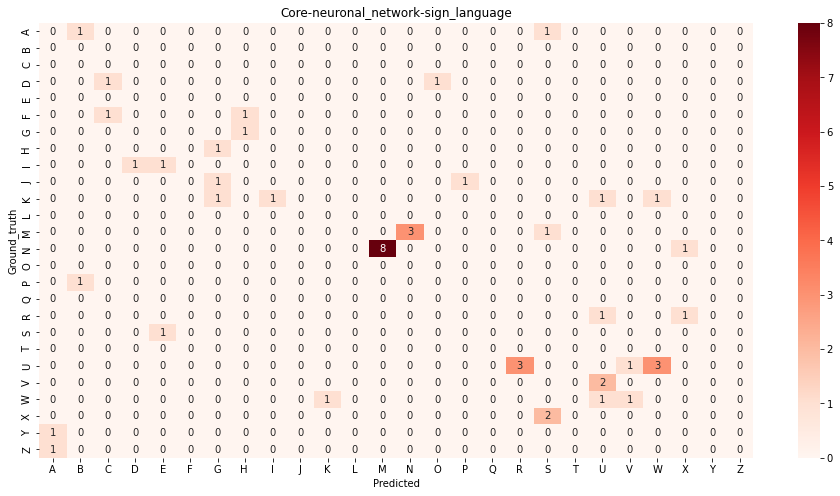

In [24]:
letters = ['A', 'B', 'C', 'D','E', 'F', 'G', 'H ', 'I', 'J', 'K','L' ,'M','N','O','P','Q','R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
plt.figure(figsize=(16,8))
plt.title("Core-neuronal_network-sign_language")
np.fill_diagonal(conf,0)
sns.heatmap(conf,
            annot=True, 
            xticklabels=letters, 
            yticklabels=letters,
            cmap="Reds")
plt.ylabel("Ground_truth")
plt.xlabel("Predicted")

/tmp/ipykernel_288/1714598118.py:3: RuntimeWarning: invalid value encountered in true_divide
  conf_norm= aux/aux.sum(axis=1)[:, np.newaxis]


Text(0.5, 69.0, 'Predicted')

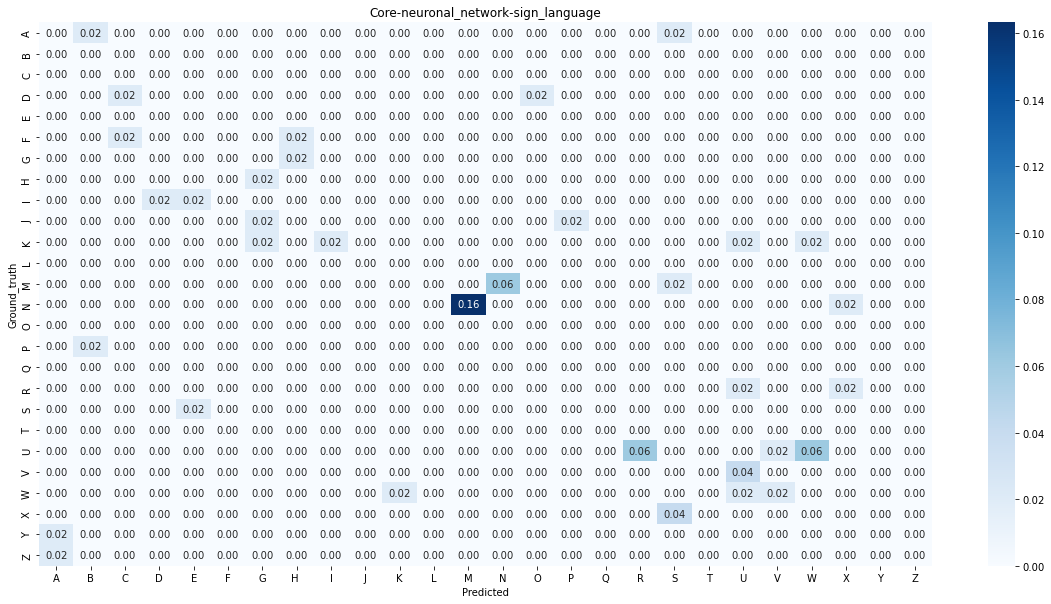

In [25]:
letters = ['A', 'B', 'C', 'D','E', 'F', 'G', 'H ', 'I', 'J', 'K','L' ,'M','N','O','P','Q','R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
aux=conf
conf_norm= aux/aux.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20,10))
plt.title("Core-neuronal_network-sign_language")
np.fill_diagonal(conf,0)
sns.heatmap(conf/np.sum(conf),
            annot=True,
            xticklabels=letters, 
            yticklabels=letters,
            fmt='.2f',
            cmap="Blues")
plt.ylabel("Ground_truth")
plt.xlabel("Predicted")

Guardo el modelo para poder probarlo con otro dataset.

In [36]:
joblib.dump(knn, 'trained_model.pkl')

['trained_model.pkl']

Cargo el modelo para probarlo.

In [40]:
knn=joblib.load('trained_model.pkl')

In [41]:
dataset_training_path="//wsl.localhost/Ubuntu-18.04/home/iremirezdeganuza/fproject/own_dataset"

In [42]:
knn.score(dataset_training_path.data, dataset_training_path.target)

AttributeError: 'str' object has no attribute 'data'